In [1]:
from __future__ import print_function, division
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [2]:
np.random.seed(17)

Using scipy.stats.norm to represent the distribution

In [3]:
mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1)

In [4]:
mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

The following function evaluates the normal (Gaussian) probability density function (PDF) within 4 standard deviations of the mean. 
<br />It takes rv object and returns a pair of NumPy arrays.

In [5]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = np.linspace(mean-num*std, mean+num*std)
    ys = rv.pdf(xs)
    return xs, ys

So, the two distribution looks like

Text(0.5,0,'Height(cm)')

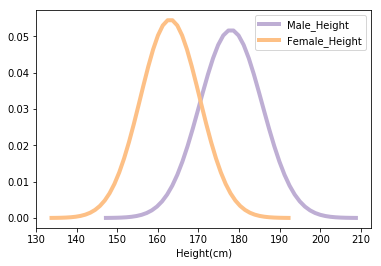

In [6]:
xs, ys = eval_pdf(male_height)
plt.plot(xs, ys, label='Male', linewidth =4, color=COLOR2)

xs, ys = eval_pdf(female_height)
plt.plot(xs, ys, label='Female', linewidth=4, color=COLOR3)
plt.legend(('Male_Height', 'Female_Height'), loc='upper right')
plt.xlabel('Height(cm)')

Use rvs to generate random samples from the population distributions. Note that these are totally random, totally representative samples, with no measurement error!

In [7]:
male_sample = male_height.rvs(100)
female_sample = female_height.rvs(100)

In [8]:
mean1, std1 = male_sample.mean(), male_sample.std()
mean1, std1

(178.85862541570782, 8.6300177930773376)

In [9]:
mean2, std2 = female_sample.mean(), female_sample.std()
mean2, std2

(163.06119550943112, 6.9263006103126479)

Now, there are many ways to describe the magnitude of the difference between these distributions. An obvious one is the difference in the means:

In [10]:
diff_in_mean = mean1 - mean2
diff_in_mean

15.797429906276705

On average men are 14-15 cm taller.
<br /><br />
There are a number of ways to quantify the difference between distributions. A simple option is to express the difference as a percentage of the mean.

In [11]:
relative_diff = diff_in_mean / male_sample
print(relative_diff * 100)

# A problem with relative differences is that you have to choose 
# which mean to express them relative to.

relative_diff = diff_in_mean / female_sample
print(relative_diff * 100)

[  8.77015007   9.6490907    8.64172916   8.45601284   8.49386447
   8.20530112   8.91805169   9.01618962   8.81824652   9.04627731
   8.11295044   8.45357422   9.63286438   8.92827849   8.67243657
   9.61321641   8.39732505   9.06052579   9.31508094   8.97199992
   9.26881584   8.49594725   8.6902551    9.04981416   9.19572468
   8.82484927   9.36625288   8.81395962   9.17469573   8.74263257
   8.51489207   8.92848672   8.83526677   8.76103998   8.51819283
   8.5532015    8.66220472   8.69985531   9.34611911   9.73210541
   9.34188053   7.75304638   8.82657317   9.14971831   8.66590334
   8.83705913   8.636627     8.61299248   9.2411769    9.18734638
   8.46512947   9.26927724   8.78206785   9.10393245   8.71305243
   8.5786737    9.11552545   8.44206245   9.15651958   9.18533691
   8.96429495   8.82905439   9.18835677  10.17829365   9.19128406
   8.76703335   8.67878416   8.84299819   7.94039703   8.64642489
   9.20793447   8.87637982   8.72656832   8.61972889   8.58700398
   8.66651

## Part 2
<br />
An alternative way to express the  difference between distributions is to see how much they overlap. To define overlap, we choose a threshold between the two means. 
<br />
The simple threshold is the midpoint between the means.

In [12]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.95991046256947

A better, but slightly more complicated threshold is the place where the PDFs cross.

In [13]:
thresh = (std1 * mean2 + std2* mean1) / (std1 + std2)
thresh

170.09484868905307

In [14]:
male_below_thresh = sum(male_sample < thresh)
male_below_thresh

12

In [15]:
female_below_thresh = sum(female_sample > thresh)
female_below_thresh

16

The "overlap" is the area under the curves that ends up on the wrong side of the threshold.

In [16]:
male_overlap = male_below_thresh / len(male_sample)
female_overlap = female_below_thresh / len(female_sample)
male_overlap, female_overlap

(0.12, 0.16)

In practical terms, you might report the fraction of people who would be misclassified if you tried to use height to guess sex, which is the average of the male and female overlap rates:

In [17]:
misclassification_rate = (male_overlap + female_overlap) / 2
misclassification_rate

0.14000000000000001

**Problem: ** Suppose a man and a woman are chosen at random. What is the probability that the man is taller?

In [26]:
sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample)

0.91000000000000003

In [27]:
(male_sample > female_sample).mean()

0.91000000000000003

### Cohen's effect size
There is one other common way to express the difference between distributions. Cohen's $d$ is the difference in means, standardized by dividing by the standard deviation. Here's the math notation:

$ d = \frac{\bar{x}_1 - \bar{x}_2} s $

where $s$ is the pooled standard deviation:

$s = \sqrt{\frac{n_1 s^2_1 + n_2 s^2_2}{n_1+n_2}}$



In [28]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [29]:
CohenEffectSize(male_sample, female_sample)

2.0189266355479889

Here's a function that encapsulates the code we already saw for computing overlap and probability of superiority.

In [31]:
def overlap_siperiority(control, treatment, n =10000):
    """
    Estimates overlap and superiority based on a sample:
    control: scipy.stats rv object
    treatment: scipy.stats rv object
    n: sample size
    """
    control_sample = control.rvs(n)
    treatment_sample = treatment.rvs(n)
    thresh = (control.mean() + treatment.mean()) / 2
    
    control_above_thresh = sum(control_sample > thresh)
    treatment_below_thresh = sum(treatment_sample < thresh)
    
    overlap = (control_above_thresh + treatment_below_thresh) / n
    superiority = (treatment_sample > control_sample).mean()
    
    return overlap, superiority

Here's the function that takes Cohen's $d$, plots normal distributions with the given effect size, and prints their overlap and superiority.

In [35]:
def plot_pdfs(cohen_d = 2):
    '''
    Plot PDFs for distribution that differ by some number of stds
    cohen_d = number of stds between the mean
    '''
    control = scipy.stats.norm(0, 1)
    treatment = scipy.stats.norm(cohen_d, 1)
    
    xs, ys = eval_pdf(control)
    plt.fill_between(xs, ys, label='control', color=COLOR3, alpha=0.7)
    
    xs, ys = eval_pdf(treatment)
    plt.fill_between(xs, ys, label='treatment', color=COLOR2, alpha=0.7)
    
    o, s = overlap_siperiority(control, treatment)
    plt.text(0, 0.05, 'overlap '+str(o))
    plt.text(0, 0.15, 'superiority '+str(s))
    plt.show()

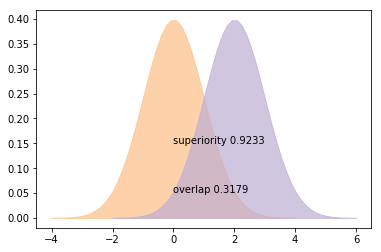

In [36]:
plot_pdfs(2)

In [37]:
slider = widgets.FloatSlider(min=0, max=4, value=2)
interact(plot_pdfs, cohen_d=slider)
None

A Jupyter Widget